In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cobaya.yaml import yaml_load_file

from cobaya.model import get_model

In [2]:
info=yaml_load_file('../tests/test_mflike_sacc.yaml')
model=get_model(info)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[camb] Importing *local* CAMB from /Users/martina/Documents/University/Projects/sys_sandbox/newsysV0.1_folder/modules/code/CAMB
[mflike.mflike] Initialising.


In [3]:
mflike=model.components[0]

In [4]:
point=({'cosmomc_theta':0.0104085, 'logA':3.044,'ns':0.9649,'ombh2':0.02237,'omch2':0.12,
        'Alens':1.0,'tau':0.0544,'a_tSZ':3.3,'a_kSZ':1.6,'a_p':6.9,'beta_p':2.08,
        'a_c':4.9,'beta_c':2.2,'a_s':3.1,'T_d':9.6,'n_CIBC':1.2,
        'yp':1.,'cTT93':1.,'cTT145':1.,'cTT225':1.,'cEE93':1.,'cEE145':1.,'cEE225':1.})

In [5]:
model.loglike(point) 

(-1660.0153154683637,
 [2.0989031673191437e-09, 67.3333789066472, 0.811068099964233])

In [6]:
point['cTT145']=10.
loglikes, derived = model.loglikes(point)
print("log-likelihood value = {}, derived parameter value (As,H0,s8) = {}".format(loglikes, derived))

log-likelihood value = [-92608763.31447662], derived parameter value (As,H0,s8) = [2.0989031673191437e-09, 67.3333789066472, 0.811068099964233]


In [7]:
lmin,lmax=2,8000
ell=np.arange(lmin, lmax)
Cl = {"tt": lmax, "ee": lmax, "te": lmax, "bb":lmax}
model.theory["camb"].needs(Cl=Cl)
Dls = model.theory["camb"].get_Cl(ell_factor=True)
dls = {cl: Dls[cl][lmin:lmax] for cl in Cl.keys()}

In [8]:
sys_params = {
    'a_flat':0,
    'a_flatpl':0,
    'yp': 1.,
    'cTT93': 1.0002,
    'cTT145': 1.,
    'cTT225': 0.99805,
    'cEE93': 1.021,
    'cEE145': 0.966,
    'cEE225': 1.04
    #'cTT93': 1.,
    #'cTT145': 1.,
    #'cTT225': 1.,
    #'cEE93': 1.,
    #'cEE145': 1.,
    #'cEE225': 1.
}

In [9]:
from mflike import get_systematic_template
from itertools import product
mflike=model.components[0]
freqs = sorted(mflike.freqs)
sys_templates = get_systematic_template(sys_params, mflike.systematics, 
                                        mflike.freqs, ell=ell)
f=mflike.freqs
cal={}
string='cTT'+str(f[0])
cal['tt',f[0]]=sys_params['cTT'+str(f[0])]
cal['tt',f[0]]
for i, cross in enumerate(product(freqs, freqs)):
    print(sys_templates['te', 'calib', cross[0], cross[1]])

0.9895635817189559
1.0173444300888046
0.9804826323296103
0.9896625331298045
1.0174461594455997
0.9805806756909201
0.9906288675936391
1.0184396226272956
0.9815381423725107


['calib', 'fromfile']


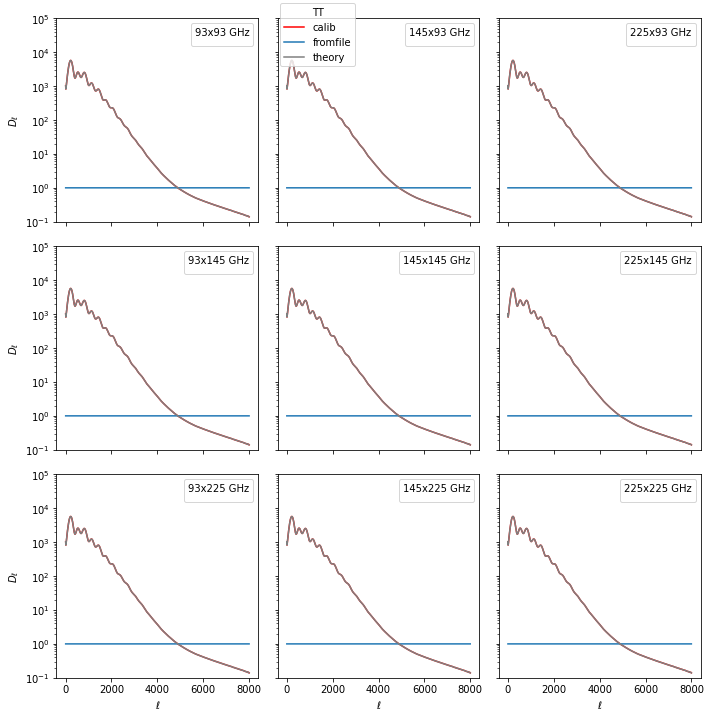

In [15]:
mode = "tt"
components = mflike.systematics["components"][mode]
print(components)
freqs = sorted(mflike.freqs)
nfreqs = len(freqs)
fig, axes = plt.subplots(nfreqs, nfreqs, sharex=True, sharey=True, figsize=(10, 10))
from itertools import product
for i, cross in enumerate(product(freqs, freqs)):
    idx = (i%nfreqs, i//nfreqs)
    #print(idx,np.triu_indices(nfreqs, k=1))
    ax = axes[idx]
    #if idx in zip(*np.triu_indices(nfreqs, k=1)):
    #  fig.delaxes(ax)
    #  continue
    #ax.plot(ell, sys_templates[mode, "all", cross[0], cross[1]], color="k")
    ax.plot(ell, dls[mode]*sys_templates[mode, "calib", cross[0], cross[1]], color="r")
    for compo in components:
        if(compo !='calib'):
            #print(compo)
            ax.plot(ell, sys_templates[mode, compo, cross[0], cross[1]])
    ax.plot(ell, dls[mode], color="tab:gray")
    ax.legend([], title="{}x{} GHz".format(*cross))
    if mode == "tt":
      ax.set_yscale("log")
      ax.set_ylim(10**-1, 10**5)
for i in range(nfreqs):
  axes[-1, i].set_xlabel("$\ell$")
  axes[i, 0].set_ylabel("$D_\ell$")
#fig.legend(["calib"] + ["theory"], title=mode.upper(), bbox_to_anchor=(0.5, 1))
fig.legend(components + ["theory"], title=mode.upper(), bbox_to_anchor=(0.5, 1))
plt.tight_layout()

Debug tests below this line. Not relevant.
-------------------------------------------------

In [20]:
from fgspectra import cross as fgc
generict=fgc.FactorizedCrossSpectrum(syl.Calibration(),syl.TemplateFromFile())
generict

(0,)
/Users/martina/Documents/University/Projects/sys_sandbox/newsysV0.1_folder/syslibrary/sysspectra/data/cl_genericTemplateTT.dat we are in _get_power_file
['/Users/martina/Documents/University/Projects/sys_sandbox/newsysV0.1_folder/syslibrary/sysspectra/data/cl_genericTemplateTT.dat'] we are in TemplateFromFile


FactorizedCrossSpectrum:
- Calibration (SED):
    cXnu1: 1.0
    cYnu2: 1.0
- TemplateFromFile (Cl):
    amp: 1.0
    ell: null
    ell_0: null

In [37]:
templ['ee','generic_fromf']=generict({},{'ell':ell,'ell_0':1500})

['calib']


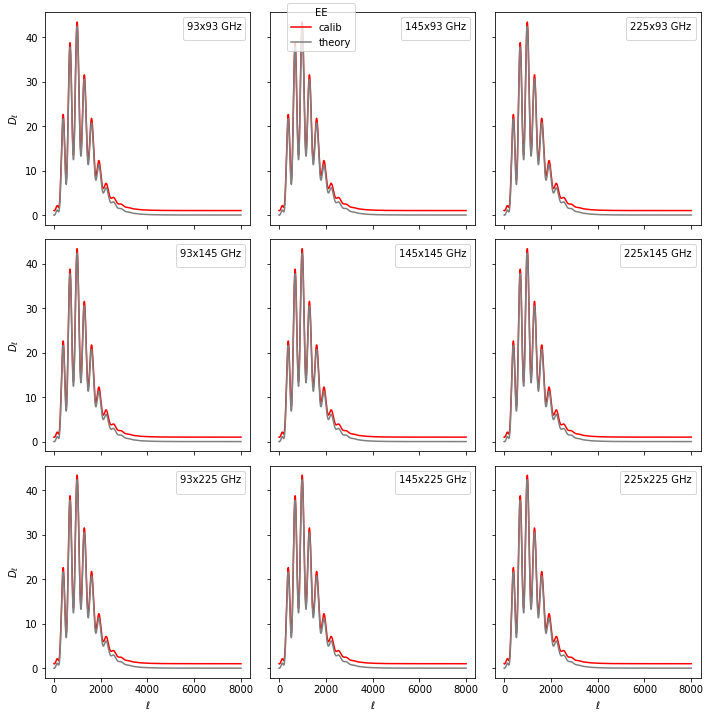

In [39]:
mode = "ee"
components = mflike.systematics["components"][mode]
print(components)
freqs = sorted(mflike.freqs)
nfreqs = len(freqs)
fig, axes = plt.subplots(nfreqs, nfreqs, sharex=True, sharey=True, figsize=(10, 10))
from itertools import product
for i, cross in enumerate(product(freqs, freqs)):
    idx = (i%nfreqs, i//nfreqs)
    #print(idx,np.triu_indices(nfreqs, k=1))
    ax = axes[idx]
    #if idx in zip(*np.triu_indices(nfreqs, k=1)):
    #  fig.delaxes(ax)
    #  continue
    #ax.plot(ell, sys_templates[mode, "all", cross[0], cross[1]], color="k")
    ax.plot(ell, dls[mode]+templ[mode,'generic_fromf'][0,0], color="r")
    #for compo in components:
    #  ax.plot(ell, sys_templates[mode, compo, cross[0], cross[1]])
    ax.plot(ell, dls[mode], color="tab:gray")
    ax.legend([], title="{}x{} GHz".format(*cross))
    if mode == "tt":
      ax.set_yscale("log")
      ax.set_ylim(10**-1, 10**5)
for i in range(nfreqs):
  axes[-1, i].set_xlabel("$\ell$")
  axes[i, 0].set_ylabel("$D_\ell$")
fig.legend(["calib"] + ["theory"], title=mode.upper(), bbox_to_anchor=(0.5, 1))
plt.tight_layout()